## Atabey's Comments

This is a good exploratory data analysis project. You haven't used any heavy-duty machine learning algorithms but you've asked many questions and I liked your visualizations and the fact that you merged many data sources. Genuine effort! Well-done.

100/100

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from mplsoccer import Pitch, VerticalPitch
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from collections import Counter
import numpy as np
import copy
from scipy.stats import spearmanr

### General Comment
Overall it was a long project. The data was not the kind of data that would tire my computer in terms of time or space, even though it was a big data in total, it was divided into many parts. Also, to be domain-specific, 500k cards have been shown so far, which is a lot of data for football, but it is not a very tiring process for the computer, so I did not have any difficulties in terms of performance. Since the data was generally clean, I did not waste time cleaning the data. In fact, although it is a big data, I could not create a solution with machine learning on any issue because it contains a lot of data that is not directly related to each other.


#### Imports

In [3]:
appearances = pd.read_csv("appearances.csv")
club_games = pd.read_csv("club_games.csv")
clubs = pd.read_csv("clubs.csv")
competitions = pd.read_csv("competitions.csv")
game_events = pd.read_csv("game_events.csv")
game_lineups = pd.read_csv("game_lineups.csv")
games = pd.read_csv("games.csv")
player_valuations = pd.read_csv("player_valuations.csv")
players = pd.read_csv("players.csv")

The coordinates of the positions on the field to use during visualization. They are only used on the visualization, so I drew them by eye. They are not a separate data set.

In [4]:
position_coordinates = {}
position_coordinates["Centre-Forward"] = [40, 110]
position_coordinates["Left-Back"] = [15, 25]
position_coordinates["Centre-Back"] = [40, 20]
position_coordinates["Attacking Midfield"] = [40, 80]
position_coordinates["Central Midfield"] = [40, 60]
position_coordinates["Defensive Midfield"] = [40, 40]
position_coordinates["Left Winger"] = [16, 95]
position_coordinates["Second Striker"] = [40, 97]
position_coordinates["Right-Back"] = [65, 25]
position_coordinates["Right Winger"] = [64, 95]
position_coordinates["Goalkeeper"] = [40, 5]
position_coordinates["Right Midfield"] = [66, 60]
position_coordinates["Left Midfield"] = [15, 60]

Data structures that I created by pulling from the original data that I used to match players with their position ids and teams names with their ids.

In [5]:
positions = {players_id: players_position for players_id, players_position in zip(players.player_id, players.sub_position)}

In [75]:
club_names = {club_id: club_name for club_id, club_name in zip(clubs.club_id, clubs.name)}

In [184]:
competition_ids = {c_id: name for c_id, name in zip(competitions.competition_id, competitions.name)}

### Q1
#### Who are the top 10 goal scorers since 2012?

For this problem we use the appearances data. We need the names of the players and the number of goals they scored in each match. After we get this data, we group the data according to the player names and sum the goals scored by the players with the sum function. This way we get the total number of goals scored by each player. Finally, we sort the players according to the number of goals they scored. Since our data set has been collected since 2012, we do not need to specify the time interval extra.

The result shows that Lionel Messi and Cristiano Ronaldo, two of the greatest footballers of all time, have scored more goals than anyone else: Robert Lewandowski. With different analyzes, it could be argued that this is because they play in different leagues or because of the contribution of other players in the team to these players, but this data does not tell us much more

In [17]:
most_goals = appearances[["player_name","goals"]][:]
most_goals.groupby(["player_name"]).sum().sort_values(by = "goals", ascending = False)[:10]

,goals
player_name,
Robert Lewandowski,449
Lionel Messi,443
Cristiano Ronaldo,432
Luis Suárez,308
Harry Kane,289
Pierre-Emerick Aubameyang,270
Karim Benzema,249
Mohamed Salah,248
Ciro Immobile,247


### Q2
#### Which players have recorded the most assists since 2012?

For this problem we use the appearances data. We need the names of the players and the number of assists they contributed in each match. After we get this data, we group the data according to the player names and sum the assists contributed by the players with the sum function. This way we get the total number of assists contributed by each player. Finally, we sort the players according to the number of assists they contributed. Since our data set has been collected since 2012, we do not need to specify the time interval extra.

If we look at this data, we see Lionel Messi and Luis Suarezi, who are also at the top of the top scorers list. Surprisingly for this data, we also see players like Dusan Tadic, Hakim Ziyech and Dimitri Payet, who have not spent their careers in big teams.

In [18]:
most_assists = appearances[["player_name","assists"]][:]
most_assists.groupby(["player_name"]).sum().sort_values(by = "assists", ascending = False)[:10]

,assists
player_name,
Lionel Messi,219
Thomas Müller,202
Kevin De Bruyne,192
Dusan Tadic,182
Ángel Di María,161
Luis Suárez,150
Neymar,136
Hakim Ziyech,132
Christian Eriksen,129


### Q3
#### Who are the top 10 goal scorers per minute played since 2012

For this question, I used the appearances file. To find the players with the most goals per minute, I need the number of goals scored and the number of minutes played by the players, so I got this data from the appearances file. To find the number of goals scored per minute by the players, I first grouped the data by player names, then summed the number of goals and minutes with the sum function. I divided the summed number of goals by the number of minutes played, so I calculated the ratio of each player and kept it in my ratio variable. Finally, I sorted the players according to their ratio values.
While finding this ratio, I eliminated players who scored less than 25 goals or played less than 1000 minutes in order to prevent players from changing the statistics only with their short-term explosions. In this way, I made the evaluation based on the long-term performance of the players.

This data reveals the reason for the popularity of Erling Haaland, whose name we have started to hear a lot in recent years. Not surprisingly, he is followed by Cristiano Ronaldo and Lionel Messi. A detail that surprises me personally is Santiago Gimenez, who I have never heard of. The names that follow are the world stars that we constantly hear about in the soccer world

In [31]:
goals_per_minute_data = appearances[["player_name","goals","minutes_played"]][:]
goals_per_minute = goals_per_minute_data.groupby(["player_name"]).sum()
goals_per_minute["ratio"] = goals_per_minute["goals"] / goals_per_minute["minutes_played"]
goals_per_minute.drop(goals_per_minute[(goals_per_minute.minutes_played < 1000) | (goals_per_minute.goals < 25)].index, inplace=True)
goals_per_minute.sort_values(by = "ratio", ascending = False)[:10]

,goals,minutes_played,ratio
player_name,,,
Erling Haaland,163,13231,0.012320
Cristiano Ronaldo,432,41150,0.010498
Lionel Messi,443,43543,0.010174
Santiago Gimenez,38,3806,0.009984
Robert Lewandowski,449,45040,0.009969
Kylian Mbappé,220,22345,0.009846
Sergio Agüero,220,22962,0.009581
Aleksandar Prijovic,57,6056,0.009412
Deniz Undav,39,4290,0.009091


### Q4
#### In which playing positions do players most frequently contribute assists?

I used the appearances file for this question. For this question, I took the players' ids and the ids of their assists from the appearances file. Then, using the positions data where I matched the players' ids with their positions, I added the number of assists to the position of the player who made the assist, so that I found the total number of assists for the players playing in each position. I then visualized this using the mplsoccer module.

Looking at this analysis, the first thing that I notice is that the strikers who are expected to score the most goals are also the players with the most assists. In addition, midfielders have produced more assists than wingers in total, which might be a surprising fact.

In [6]:
assists_by_position_data = appearances[["player_id","assists"]][:].groupby(["player_id"]).sum()
assists_by_position_data.drop(assists_by_position_data[assists_by_position_data.assists == 0].index, inplace=True)
assists_by_position_data.dropna(inplace = True)
assists_by_position_data.reset_index(level = 0,  inplace=True)
assists_by_position = defaultdict(int)
for p_id, assist in zip(assists_by_position_data.player_id, assists_by_position_data.assists):
    assists_by_position[positions.get(p_id, "Unknown Player")] += assist
assists_by_position.pop("Unknown Player")

5

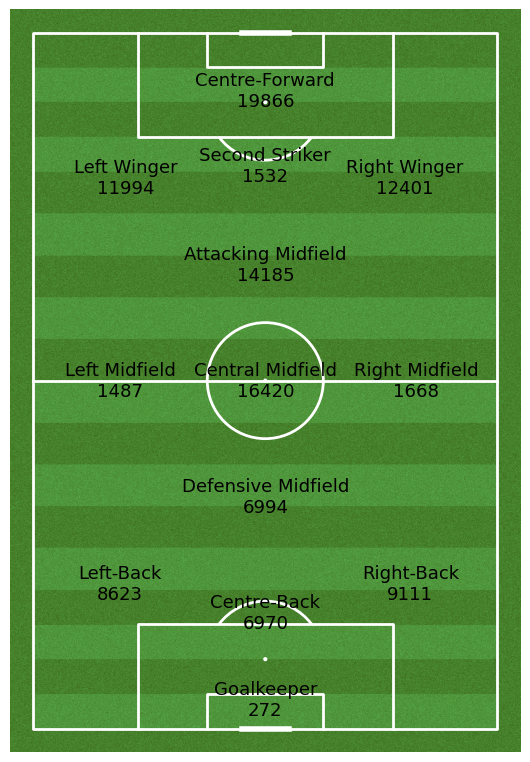

In [7]:
assists_pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, pitch_length=200, pitch_width=180)
fig, ax = assists_pitch.draw(figsize=(10, 7.727))
x_position = 66
y_position = 60
for pos, assist in assists_by_position.items():
    if type(pos) != str:
        continue
    position = position_coordinates[pos]
    ax.text(position[0], position[1], str(pos) + "\n" + str(assist), color='black', fontsize=13, ha='center', va='center')

plt.show()

### Q5
#### Who are the top 10 players with the most cards since 2012?

For this question I used the appearances file. I take the number of yellow cards, the number of red cards and the number of minutes played by the players, then I eliminate the players with the number of yellow cards seen equal to 0 and the number of red cards seen equal to 0. I sum the number of yellow cards and the number of red cards seen for each player in the total_cards column to get the total number of cards shown to the player. For an extra comment I calculate the number of cards seen by the players relative to the number of minutes played and store this in the card_per_minute variable. I sorted the data by total_cards to find the players who saw the most cards, and sorted the data by card_per_minute to find the players who saw the most cards per minute.

According to the data, Danilo leads both the list of players with the most cards and the list of players with the most cards per minute. Although the likes of Marcelo Fernando and Sergio Ramos are the most carded players, their low card per minute rate highlights the amount of time they play. In addition, the fact that we see so many Turkish players or players who have played in Turkey in the list of players with the most cards per minute creates different question marks about the Turkish league.

In [25]:
seen_card_data = appearances[["player_name", "yellow_cards", "red_cards","minutes_played"]][:]
seen_card_data = seen_card_data.drop(seen_card_data[(seen_card_data.yellow_cards == 0)  & (seen_card_data.red_cards == 0)].index)
seen_card_data["total_cards"] = seen_card_data["yellow_cards"] + seen_card_data["red_cards"]
seen_card_data = seen_card_data.drop(["yellow_cards", "red_cards"], axis = 1)
seen_card_data["card_per_minute"] = seen_card_data.total_cards / seen_card_data.minutes_played
seen_card_data = seen_card_data.groupby("player_name").sum().sort_values(by = "total_cards", ascending = False)
seen_card_data[:20]

,minutes_played,total_cards,card_per_minute
player_name,,,
Danilo,16983,216,5.055910
Paulinho,13825,184,3.105369
Marcelo,14957,179,3.229623
Fernando,14015,171,2.341713
Sergio Ramos,11434,143,1.870447
Felipe,11205,139,1.930424
Sergio Busquets,11173,137,1.959233
Raúl García,9350,131,2.692623
Marco Verratti,9938,129,1.883433


In [24]:
seen_card_data.groupby("player_name").sum().sort_values(by = "card_per_minute", ascending = False)[:20]

,minutes_played,total_cards,card_per_minute
player_name,,,
Danilo,16983,216,5.055910
Ceyhun Gülselam,5786,81,3.850791
John Guidetti,1360,25,3.593340
Caner Erkin,7733,101,3.573399
Jaime Mata,3103,50,3.572818
Edgar Costa,4608,72,3.520588
Luís Neto,8804,106,3.396404
Sinan Bakis,608,15,3.295666
Tolgay Arslan,4509,70,3.248120


### Q6
 #### In which playing positions do players most frequently receive yellow cards?

For this question I used the appearances file, from which I got the players' ids and the number of yellow cards they have seen.
To find the number of yellow cards seen by a player in each position, I used the positions data where I matched players to their positions and counted the number of cards seen for each position. Then I visualized the data using the mplsoccer module.

When we look at this data, it is common sense that defenders see more cards than other positions. It can be said that central midfielders and defensive midfielders also see more number of cards when compared to defenders. Again in line with common sense, the number of cards seen by players on the left side of the pitch and the number of cards seen by players on the right side of the pitch are too close to each other to make sense. 

In [36]:
yellow_card_data = appearances[["player_id", "yellow_cards"]][:]
yellow_card_data = yellow_card_data.drop(yellow_card_data[yellow_card_data.yellow_cards == 0].index)
yellow_cards_by_positions = defaultdict(int)
for p_id, card in zip(yellow_card_data.player_id, yellow_card_data.yellow_cards):
    yellow_cards_by_positions[positions.get(p_id, "Unknown Player")] += card
yellow_cards_by_positions.pop("Unknown Player")

66

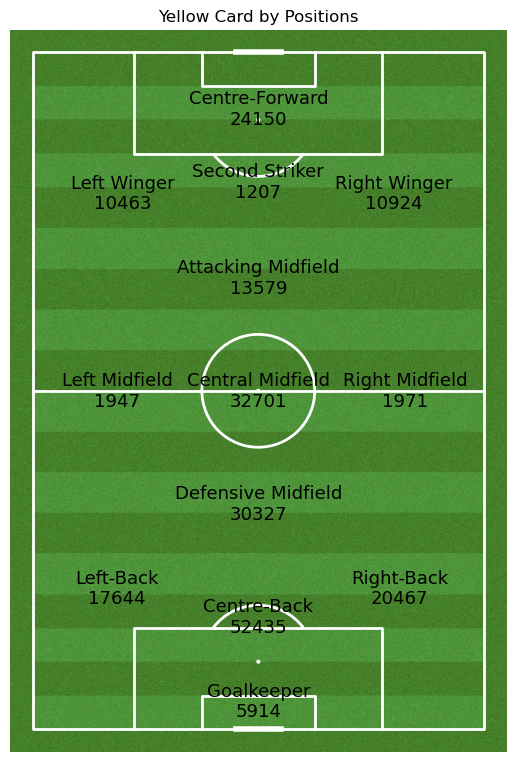

In [37]:
yellow_pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, pitch_length=200, pitch_width=180)
fig, ax = yellow_pitch.draw(figsize=(10, 7.727))
x_position = 66
y_position = 60
for pos, assist in yellow_cards_by_positions.items():
    if type(pos) != str:
        continue
    position = position_coordinates[pos]
    ax.text(position[0], position[1], str(pos) + "\n" + str(assist), color='black', fontsize=13, ha='center', va='center')
plt.title("Yellow Card by Positions")
plt.show()

### Q7
#### In which playing positions do players most frequently receive red cards?

For this question I used the appearances file, from which I got the players' ids and the number of red cards they have seen. To find the number of red cards seen by a player in each position, I used the positions data where I matched players to their positions and counted the number of cards seen for each position. Then I visualized the data using the mplsoccer module. In addition to the yellow card data, I also looked at the ratio of yellow cards to red cards received by positions to see if there is a tendency for positions to receive different cards. 

When we look at the data, although the number of red cards is different from the number of yellow cards, when we look at the ratios of the positions to each other, we do not see much difference except for one position: Goalkeepers. While the yellow card to red card ratio varies between 30 - 45 for positions other than goalkeepers, the number of yellow cards seen by goalkeepers is only 15 times the number of red cards. Further research can be done on whether this is because goalkeepers receive fewer yellow cards or more red cards. Goalkeepers are followed by center backs at the same rate, who are also more likely to see red cards than other positions.

In [42]:
red_card_data = appearances[["player_id", "red_cards"]][:]
red_card_data.dropna(inplace = True)
red_card_data = red_card_data.drop(red_card_data[red_card_data.red_cards == 0].index)
red_cards_by_positions = defaultdict(int)
for p_id, card in zip(red_card_data.player_id, red_card_data.red_cards):
    red_cards_by_positions[positions.get(p_id, "Unknown Player")] += card
red_cards_by_positions.pop("Unknown Player")

2

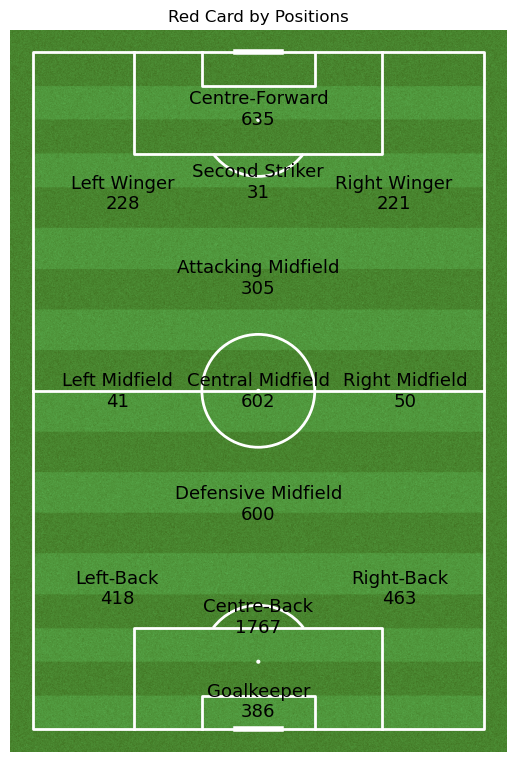

In [88]:
red_pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, pitch_length=200, pitch_width=180)
fig, ax = red_pitch.draw(figsize=(10, 7.727))
x_position = 66
y_position = 60
for pos, assist in red_cards_by_positions.items():
    if type(pos) != str:
        continue
    position = position_coordinates[pos]
    ax.text(position[0], position[1], str(pos) + "\n" + str(assist), color='black', fontsize=13, ha='center', va='center')
plt.title("Red Card by Positions")
plt.show()

In [43]:
yellow_red_ratio = {pos: (yellow_cards_by_positions[pos] / red_cards_by_positions[pos]) for pos in yellow_cards_by_positions.keys()}
yellow_red_ratio

{'Right-Back': 44.20518358531317,
 'Defensive Midfield': 50.545,
 'Centre-Back': 29.674589700056593,
 'Centre-Forward': 38.031496062992126,
 'Left Midfield': 47.48780487804878,
 'Left Winger': 45.89035087719298,
 'Left-Back': 42.21052631578947,
 'Central Midfield': 54.320598006644516,
 'Attacking Midfield': 44.52131147540984,
 'Right Midfield': 39.42,
 'Right Winger': 49.42986425339367,
 'Second Striker': 38.935483870967744,
 'Goalkeeper': 15.321243523316062,
 nan: 110.5}

### Q8
#### What changes have occurred in the number of spectators in football matches over the years?

For this question, I took competition_id season and attendance data from the games file. In this question, I wrote a function called attendance_by_competition to plot all seasons of each league separately. In this function, I calculate the average attendance of the desired league during the season and plot it.

When we look at the average number of fans in the leagues over the years, we see that there is a slight increase and fluctuation from 2012 to 2018 without very rapid changes. Between 2018 and 2020, the number of fans who saw the peak between 2018 and 2020 hits the bottom by 2020, but this bottom does not last long and in 2022, the fans continue to come to the matches with all their enthusiasm.
The biggest exception to this general trend is the Turkish league. Not only does it have an average number of fans far below other leagues, but it also goes through very turbulent periods. In 2014, when other leagues experienced very small fluctuations, the number of fans fell by half and there were very small changes until 2016. While the number of fans who saw the peak from 2016 to 2017 suddenly saw the peak, from 2018 to 2020, it is experiencing a serious decline again. As of 2021, even if it starts to recover a little, it is currently far from its heyday.

In [68]:
attendance_data = games[["competition_id", "season", "attendance"]][:]

In [69]:
def attendance_by_competition(data, comp_id):
    competition_data = data[data.competition_id == comp_id]
    competition_data.attendance.groupby(attendance_data.season).mean().plot(figsize = (15,7))

In [70]:
competitions[["name", "competition_id"]]

,name,competition_id
0,italy-cup,CIT
1,johan-cruijff-schaal,NLSC
2,kypello-elladas,GRP
3,supertaca-candido-de-oliveira,POSU
4,russian-super-cup,RUSS
5,supercopa,SUC
6,uefa-super-cup,USC
7,superligaen,DK1
8,europa-league,EL
9,laliga,ES1


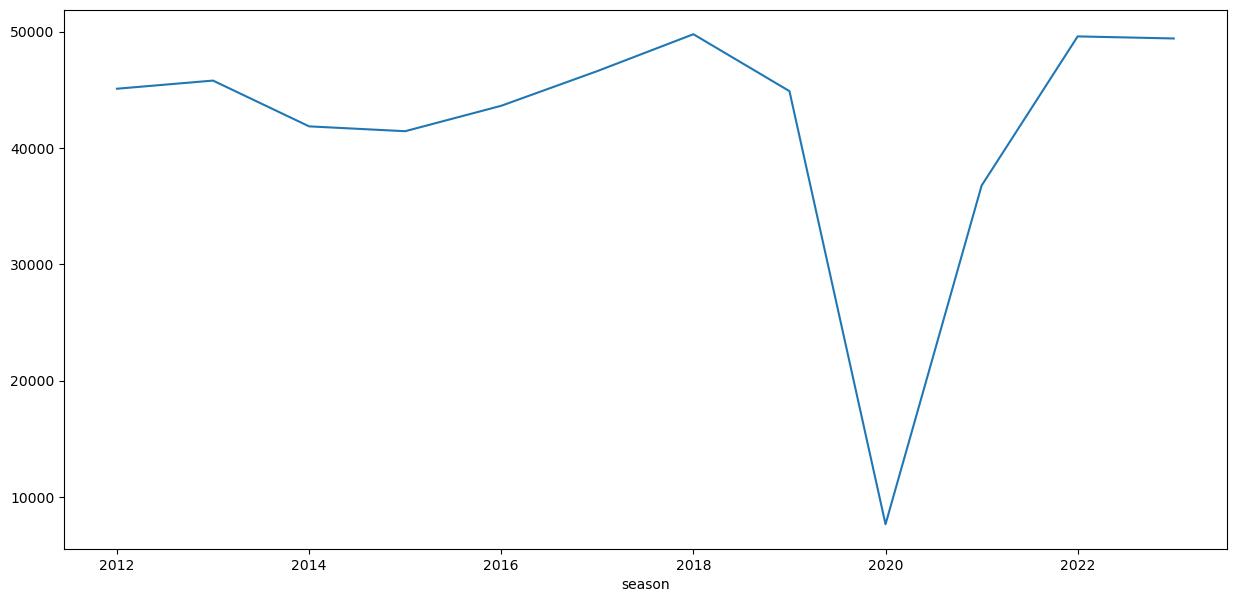

In [71]:
attendance_by_competition(attendance_data, "CL")

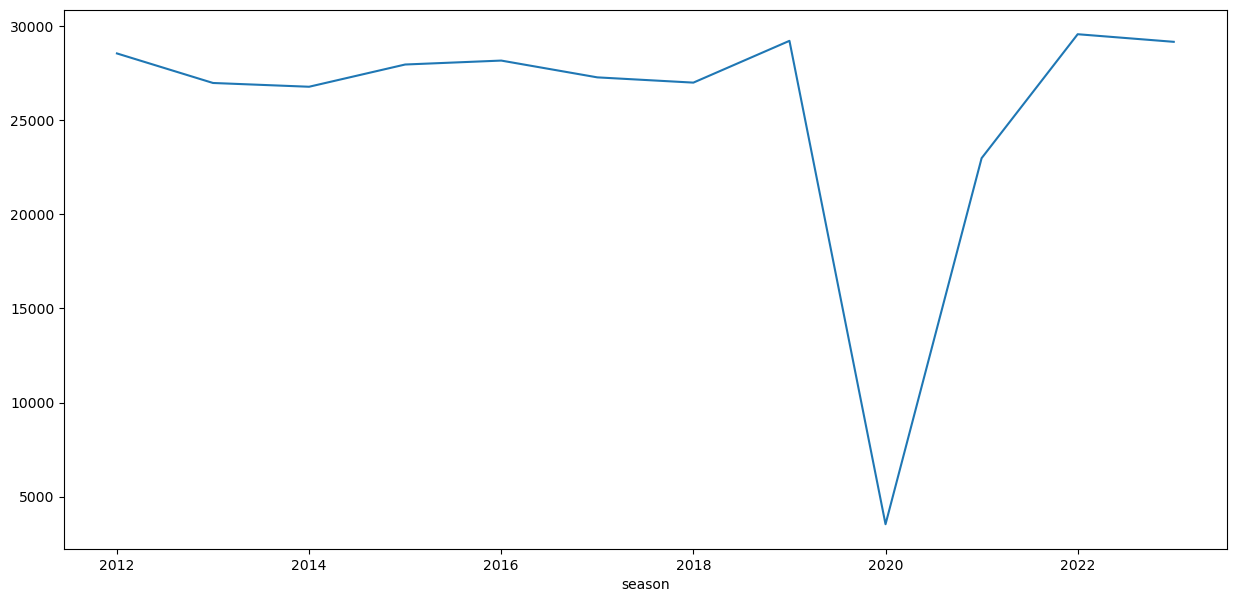

In [72]:
attendance_by_competition(attendance_data, "ES1")

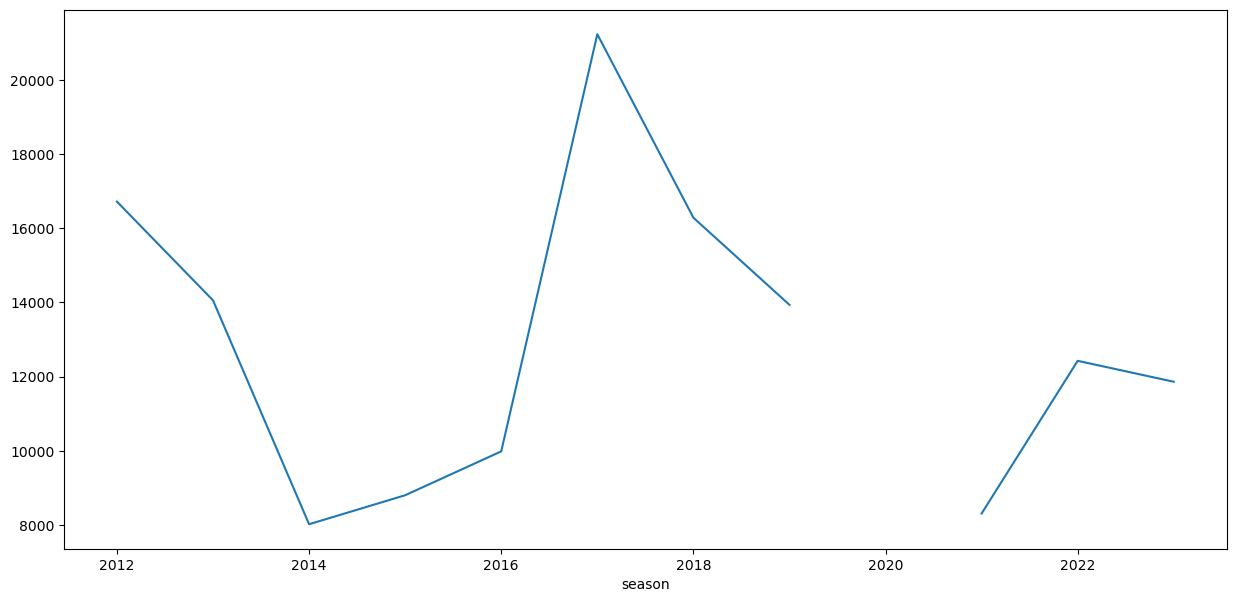

In [73]:
attendance_by_competition(attendance_data, "TR1")

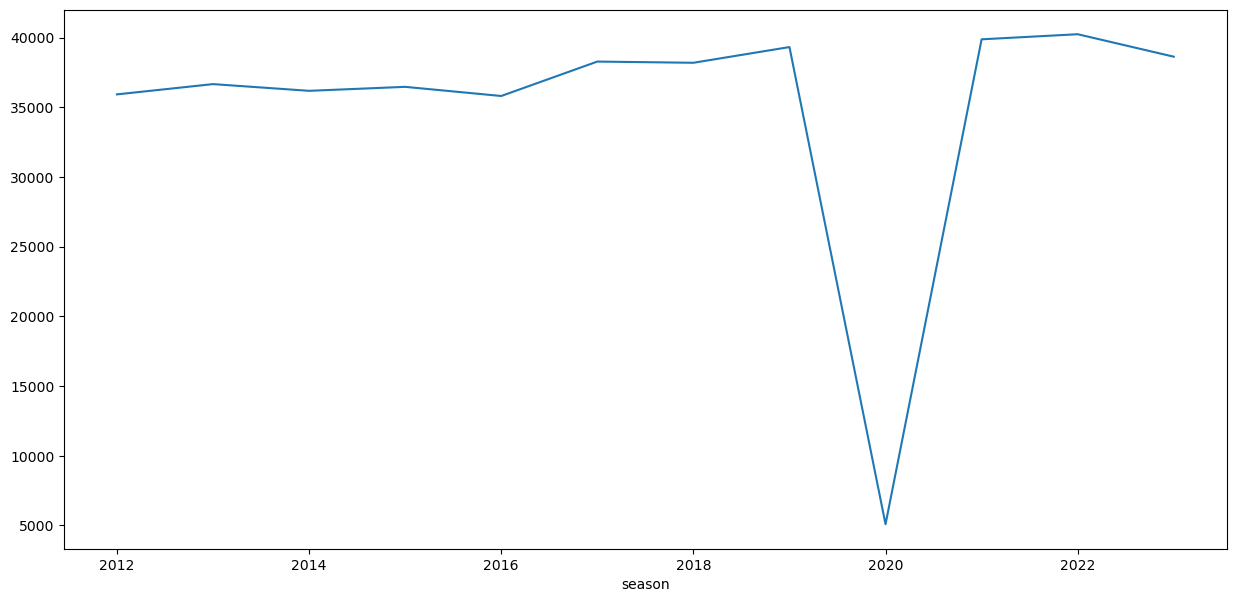

In [74]:
attendance_by_competition(attendance_data, "GB1")

### Q9

#### Which are the top 10 teams for both scoring and conceding goals since 2012?

For this, I used club_id own_goals and opponent_goals data from the club_games file. I divided the number of goals scored by each team by the number of goals conceded and stored this in the ratio variable. I sorted the data first by the number of goals scored and then by the ratio of goals scored to goals conceded.

The first thing that I notice when I look at the data is that the teams in both lists are almost identical. The teams with the most goals scored are also the teams with the highest number of goals scored compared to the number of goals conceded. Unsurprisingly, Real Madrid, Barcelona and Bayer Munich, known as the biggest clubs in the world, top these lists.

In [117]:
goals = club_games[["club_id", "own_goals", "opponent_goals"]][:]
goals["ratio"] = goals.own_goals / goals.opponent_goals
goals = goals.replace({"club_id": club_names})
goals.dropna(inplace = True)
goals.drop(goals[(goals.own_goals == 0) | (goals.opponent_goals == 0)].index, inplace = True)

In [122]:
goals.groupby("club_id").sum().sort_values(by = "own_goals", ascending = False)[:20]

,own_goals,opponent_goals,ratio
club_id,,,
Real Madrid Club de Fútbol,953,562,741.200000
FC Bayern München,858,491,656.025000
Futbol Club Barcelona,855,503,668.550000
Borussia Dortmund,791,597,553.788095
Manchester City Football Club,768,494,599.983333
Eindhovense Voetbalvereniging Philips Sport Vereniging,764,491,579.648810
Società Sportiva Calcio Napoli,738,525,549.316667
Liverpool Football Club,729,554,523.135714
AFC Ajax Amsterdam,715,471,550.307143


In [120]:
goals.groupby("club_id").sum().sort_values(by = "ratio", ascending = False)[:20]

,own_goals,opponent_goals,ratio
club_id,,,
Real Madrid Club de Fútbol,953,562,741.200000
Futbol Club Barcelona,855,503,668.550000
FC Bayern München,858,491,656.025000
Manchester City Football Club,768,494,599.983333
Eindhovense Voetbalvereniging Philips Sport Vereniging,764,491,579.648810
Borussia Dortmund,791,597,553.788095
AFC Ajax Amsterdam,715,471,550.307143
Società Sportiva Calcio Napoli,738,525,549.316667
Paris Saint-Germain Football Club,647,408,527.950000


### Q10
 #### Which are the top 10 teams for both winning and losing matches since 2012?

For this question, I took club_id own_goals and opponent goals data from the club games file. I created a dictionary to store the match results of the teams and assigned a 3-element list to each dictionary, representing wins, draws and defeats respectively. Then, using the goal data from goals_data, I increased the list element representing the team match results, so I counted how many wins, draws and defeats each team had. 0 Wins 1 Draws 2 Defeats

When we look at this data, we see a very similar result to the data above. The teams on the top scorers list are also the teams with the most wins to a large extent. If we think further, we can also examine the relationship between the number of goals scored and the number of wins

In [123]:
goals_data = club_games[["club_id", "own_goals", "opponent_goals"]][:]

In [124]:
club_results = {}
for c_id in goals_data.club_id:
    club_results[c_id] = [0, 0, 0]

for c_id, own_goals, opp_goals in zip(goals_data.club_id, goals_data.own_goals, goals_data.opponent_goals):
    index = 0
    if own_goals == opp_goals:    index = 1
    if own_goals < opp_goals:    index = 2
    club_results[c_id][index] += 1

In [144]:
results = pd.DataFrame.from_dict(club_results, orient = 'index')
results.reset_index(level=0, inplace=True)
results.replace({"index": club_names}, inplace = True)
results.groupby(by = "index").sum().sort_values(by = 0, ascending = False)[:25]


,0,1,2
index,,,
FC Bayern München,442,71,70
Futbol Club Barcelona,434,107,92
Real Madrid Club de Fútbol,431,104,100
Manchester City Football Club,413,89,107
Juventus Football Club,402,100,101
The Celtic Football Club,401,91,94
Paris Saint-Germain Football Club,369,90,77
Sport Lisboa e Benfica,366,92,85
Olympiakos Syndesmos Filathlon Peiraios,359,95,95


### Q12
#### Which teams are the most and least successful in converting opportunities into goals?

For this question I took the club_id own_goals and own_position data from the club_games file. To find the rate of teams converting the positions they entered into goals, I divided the number of goals they scored by the number of positions they entered. To find the teams with the highest success rate, it was enough to sort the teams according to their rates, but when I sorted the teams with the lowest success rate, I had to remove the data that I did not want to distort the statistics because they did not score enough goals or did not enter enough positions, so I sorted the teams that scored at least 100 goals.

When we look at the data, we see an unsurprising team like Bayer Munich in the lead. The Celtic Football Club and FC Shakhtar Donetsk are not at the top of the list of teams with the most goals scored or the most wins, but they are quite high on the list. Teams such as Real Madrid and Manchester City Football Club, which are not that high in the rate of converting the positions they enter into goals among the top scoring teams, make us wonder about the effect of the number of positions entered and the number of goals scored on the wins of the teams, which we encounter as a separate question in the future.

In [145]:
opportunity_data = club_games[["club_id", "own_goals", "own_position"]][:]
opportunity_data.dropna(inplace = True)
opportunity_data = opportunity_data.groupby("club_id").sum()
opportunity_data["ratio"] = opportunity_data["own_goals"] / opportunity_data["own_position"]
opportunity_data.reset_index(level=0, inplace=True)
opportunity_data.replace({"club_id": club_names}, inplace = True)
opportunity_data.sort_values(by = "ratio", ascending = False)[:20]

,club_id,own_goals,own_position,ratio
15,FC Bayern München,1051,574.0,1.831010
93,The Celtic Football Club,980,553.0,1.772152
142,FC Shakhtar Donetsk,723,483.0,1.496894
128,Paris Saint-Germain Football Club,1003,785.0,1.277707
146,Olympiakos Syndesmos Filathlon Peiraios,748,608.0,1.230263
45,Futbol Club Barcelona,1061,887.0,1.196167
135,AFC Ajax Amsterdam,964,851.0,1.132785
78,Sport Lisboa e Benfica,853,781.0,1.092190
173,AO FK Zenit Sankt-Peterburg,699,670.0,1.043284
149,Futebol Clube do Porto,789,758.0,1.040897


In [149]:
opportunity_data[opportunity_data.own_goals > 100].sort_values(by = "ratio", ascending = True)[:20]

,club_id,own_goals,own_position,ratio
210,Norwich City,157,3192.0,0.049185
248,Elche CF,169,3111.0,0.054323
108,Apollon Smyrnis,112,2009.0,0.055749
337,FC Crotone,119,2113.0,0.056318
206,ESTAC Troyes,185,3229.0,0.057293
225,CD Leganés,133,2238.0,0.059428
76,Sunderland AFC,190,3191.0,0.059542
281,Cádiz Club de Fútbol S.A.D,111,1861.0,0.059645
287,SPAL,110,1840.0,0.059783
300,Dijon FCO,184,2948.0,0.062415


### Q13
#### As of 2023, which are the top 10 teams with the highest squad values?

For this and the 20. question I used the name market_value_in_eur current_club_id and date_of_birth columns from the players file.
To keep the squad value of each team, I created a dictionary and created a 3-element list for each team, where the first element is the squad value, the second element is the number of players in the team and the third element is the sum of the players' ages. In order to calculate the current market value of the teams, I needed to find the players who are still playing active football, so I took the players whose last_season value is equal to 2023.
After collecting the data in a dictionary called club_squads, I converted the dictionary into a pandas dataFrame and sorted the teams by squad value.

Looking at the data, it is the English teams that stand out. Despite not being on the list of top scorers or top winners, teams like Aston Villa Football Club and Newcastle United Football Club are making us question the importance of squad value, which could be a good subject for analysis.

In [151]:
squad_data = players[players.last_season == 2023][:][["name","market_value_in_eur","current_club_id","date_of_birth"]]
club_squads = defaultdict(list)
for value, club,date in zip(squad_data.market_value_in_eur, squad_data.current_club_id, squad_data.date_of_birth):
    while len(club_squads[club]) != 3:
        club_squads[club].append(0)
    if value > 0:
        club_squads[club][0] += value
        club_squads[club][1] += 1
        club_squads[club][2] += 2023 - int(date[:4])


In [152]:
club_squads = dict(club_squads)

club_squads_df = pd.DataFrame(list(club_squads.values()), columns = ["Value", "Count", "Total_Age"], index = list(club_squads.keys()))
club_squads_df = club_squads_df.sort_values(by = "Value", ascending = False)
club_squads_df.reset_index(inplace = True,level = 0)
club_squads_df.replace({"index": club_names}, inplace = True)
club_squads_df[:20]


,index,Value,Count,Total_Age
0,Manchester City Football Club,1.264700e+09,24,642
1,Arsenal Football Club,1.095500e+09,25,636
2,Paris Saint-Germain Football Club,1.066800e+09,29,733
3,Real Madrid Club de Fútbol,1.026000e+09,23,625
4,Chelsea Football Club,9.990000e+08,30,702
5,FC Bayern München,8.977000e+08,25,658
6,Liverpool Football Club,8.773000e+08,26,669
7,Manchester United Football Club,8.773000e+08,31,801
8,Futbol Club Barcelona,8.620000e+08,21,552
9,Tottenham Hotspur Football Club,7.476000e+08,29,745


### Q14
#### As of 2023, which teams have the highest and lowest average squad ages?

For this question, I used the name and average_age columns from the clubs table. After receiving the data, I sorted the data according to the average_age value after eliminating non-numeric values.

When we look at the data, the fact that the teams with the lowest Squad Value are from Turkey is the first detail that catches the eye, and the fact that the team with the highest average age is also from Turkey is another surprising information.

In [160]:
age_data = clubs[["name", "average_age"]][:]
age_data.dropna(inplace = True)
age_data.sort_values(by = "average_age", ascending = False)[:10]

,name,average_age
276,Pendikspor,29.6
206,Rayo Vallecano de Madrid S.A.D.,29.2
64,Club Atlético de Madrid S.A.D.,29.2
272,Cádiz Club de Fútbol S.A.D,29.1
182,Sivasspor Kulübü,29.1
113,Villarreal Club de Fútbol S.A.D.,29.1
186,Panathinaikos Athlitikos Omilos,29.0
332,PAS Lamia 1964,28.9
383,Sevilla Fútbol Club S.A.D.,28.9
79,Football Club Internazionale Milano S.p.A.,28.9


In [155]:
age_data.sort_values(by = "average_age", ascending = True)[:10]

,name,average_age
71,PFK Lviv,18.3
122,Orduspor,20.0
200,Akhisarspor,21.0
150,Bursaspor,21.4
121,Balikesirspor,22.0
35,Giresunspor,22.5
406,Fodbold Club Nordsjælland,22.6
99,Esbjerg fB,22.7
104,FC Girondins Bordeaux,22.7
422,Football Club Volendam,22.8


### Q15
#### As of 2023, which are the top 10 teams with the highest stadium capacities?

For this question, I took the name and stadium_seats columns from the clubs file. After eliminating values that are not a number, I sorted the data according to the stadium_seats variable.

In this data, we are not greeted by the teams we hear about most often or the teams with the most wins. Borussia Dortmund and Real Madrid Club de Fútbol, known for their fans, are followed by Torpedo Moscow, a surprising fact for us.
Fatih Karagümrük from Turkey, with its Ataturk Olympic stadium, also appears on the list.

In [162]:
stadium_data = clubs[["name", "stadium_name", "stadium_seats"]][:]
stadium_data.dropna(inplace = True)
stadium_data.sort_values(by = "stadium_seats", ascending = False)[:10]

,name,stadium_name,stadium_seats
178,Borussia Dortmund,SIGNAL IDUNA PARK,81365
281,Real Madrid Club de Fútbol,Santiago Bernabéu,81044
174,Torpedo Moscow,Luzhniki Stadium,81000
309,Associazione Calcio Milan,Giuseppe Meazza,75923
79,Football Club Internazionale Milano S.p.A.,Giuseppe Meazza,75923
404,FC Bayern München,Allianz Arena,75024
242,Manchester United Football Club,Old Trafford,74879
236,Fatih Karagümrük Sportif Faaliyetler San. Tic....,Atatürk Olimpiyat,74753
389,Hertha BSC,Olympiastadion Berlin,74667
279,Società Sportiva Lazio S.p.A.,Olimpico di Roma,73261


### Q16
#### What is the average squad value for teams in each league?

For this question, I used the club_id and domestic_competition_id columns from the clubs file and the club_squad data I used in question 13. For each league, I created a list with 3 elements. In the first element of the list, I kept the total squad value of the league, in the second element the number of players in that league and in the last element the number of teams in that league.
To find the average market value of the players in the league, I divided the total squad value of the league by the number of players. When showing the data, I divided the data by 100 so that it does not exceed the integer limit.

When we look at the data, we can understand why the English League, the Spanish League, the Italian League, the German League and the French League are called the 5 biggest leagues in Europe.

In [175]:
average_squad_of_leagues_data = clubs[["club_id", "domestic_competition_id"]][:]
league_squads = {league: [0, 0, 0] for league in average_squad_of_leauges_data.domestic_competition_id}
for c_id, league in zip(average_squad_of_leagues_data.club_id, average_squad_of_leagues_data.domestic_competition_id):
    if c_id not in club_squads:
        continue
    league_squads[league][0] += club_squads[c_id][0]
    league_squads[league][1] += club_squads[c_id][1]
    league_squads[league][2] += 1

In [196]:
average_squad_of_leagues = {league: values[0] / (values[1] * 100)  for league, values in league_squads.items()}
average_squad_of_leagues = pd.DataFrame.from_dict(average_squad_of_leagues, orient = "index")
average_squad_of_leagues.reset_index(level = 0,  inplace=True)
average_squad_of_leagues = average_squad_of_leagues.replace({"index":competition_ids})
average_squad_of_leagues.sort_values(by = 0, ascending = False)

,index,0
4,premier-league,199637.432188
11,laliga,97627.811861
3,serie-a,83122.574956
0,bundesliga,78228.388998
13,ligue-1,76168.737060
9,liga-portugal-bwin,27628.336756
7,eredivisie,20481.540084
5,jupiler-pro-league,19824.047619
1,premier-liga,19714.200477
2,super-lig,19023.927393


### Q17
#### What is the average squad size for teams in each league?

For this question, I used the data named league_squads that I created in the previous question. When I divided the second element of the list representing each league in the league_squads data, that is, the total age value, by the third element, that is, the total number of players, I found the average age value of each league.

When we look at the data, we see the Turkish Super League as the team with the highest average age. The closest follower with the most valuable squad is the Italian league, which has an average age of about 2 points younger. In general, we can say that the average age of the leagues is in the 26-27 band.

In [198]:
average_squad_size_of_leagues = {league: values[1] / values[2] for league, values in league_squads.items()}
average_squad_size_of_leagues = pd.DataFrame.from_dict(average_squad_size_of_leagues, orient = "index")
average_squad_size_of_leagues.reset_index(level = 0,  inplace=True)
average_squad_size_of_leagues = average_squad_size_of_leagues.replace({"index":competition_ids})
average_squad_size_of_leagues.sort_values(by = 0, ascending = False)

,index,0
2,super-lig,30.300000
8,super-league-1,30.071429
3,serie-a,28.350000
0,bundesliga,28.277778
4,premier-league,27.650000
12,premier-liga,27.312500
9,liga-portugal-bwin,27.055556
13,ligue-1,26.833333
7,eredivisie,26.333333
5,jupiler-pro-league,26.250000


### Q18
#### What is the average stadium capacity for teams in each league?

For this question, I used the domestic_competition_id and stadium_seats columns from the clubs doyeden. After grouping the data by domestic_competition_id, I calculated the average of the stadium_seats variable.

Looking at the data, the German and English leagues are at the top of the list, in line with the number of fans over the years. Although the Turkish league seems to be far behind in terms of average fans, it does not have a bad position in terms of stadium capacity.

In [233]:
average_seats_data = clubs[["domestic_competition_id", "stadium_seats"]][:]
average_seats_data = average_seats_data.groupby(by = "domestic_competition_id").mean().sort_values(by = "stadium_seats", ascending = False)
average_seats_data.reset_index(level = 0,  inplace=True)
average_seats_data = average_seats_data.replace({"domestic_competition_id":competition_ids})
average_seats_data

,domestic_competition_id,stadium_seats
0,bundesliga,40631.275862
1,premier-league,34641.416667
2,laliga,31475.750000
3,premier-liga,31220.656250
4,serie-a,30120.810811
5,ligue-1,26239.314286
6,super-lig,25495.650000
7,scottish-premiership,18169.562500
8,eredivisie,17515.714286
9,liga-portugal-bwin,16597.969697


### Q19
#### Which league produces the most national team players?

For this question, I used the domestic_competition_id and national_team_players columns from the clubs file. After grouping the data by value, I summed the national_team_players value to find out how many national team players there are in each league.

When we look at this data, we see that the English league, which has the highest squad value, has by far the highest number of national team players. Other big leagues such as Italy, France and Germany have the most national team players, right after England, which is why they are once again considered the biggest leagues.

In [235]:
national_team_player_data = clubs[["domestic_competition_id", "national_team_players"]][:]
national_team_player_data = national_team_player_data.groupby("domestic_competition_id").sum()
national_team_player_data.reset_index(level = 0,  inplace=True)
national_team_player_data = national_team_player_data.replace({"domestic_competition_id":competition_ids})
national_team_player_data.sort_values(by = "national_team_players", ascending = False)

,domestic_competition_id,national_team_players
4,premier-league,418
6,serie-a,264
3,ligue-1,238
7,bundesliga,204
2,laliga,166
12,super-lig,149
0,jupiler-pro-league,115
10,premier-liga,112
8,eredivisie,91
9,liga-portugal-bwin,89


### Q20

#### What is the relationship between the percentage of foreign players in a team and its squad value?

In this question, I used the club_squads data I created in question 13 and the club_id and foreigners_percentage columns from the clubs file. I added the foreigners_percentage variable from the clubs file to the squad_for_foreigns data so that I had the total player value of each team and the percentage of foreign players in the squad.
To use the Pearson correlation coefficient, I gave the np.corrcoef function the data of the squad values of the teams and the data of the percentage of foreign players. It returned me the correlation coefficient between these two values.

According to this data, there is a ratio of 0.3 between a team's squad value and the average foreign player.

In [237]:
squad_for_foreigns = copy.deepcopy(club_squads)
for c_id, foreigners_percentage in zip(clubs.club_id, clubs.foreigners_percentage):
    if c_id in squad_for_foreigns.keys():
        squad_for_foreigns[c_id][1] = foreigners_percentage
    

In [238]:
squad_values = []
percentage_values = []

for value in squad_for_foreigns.values():
    if np.isnan(value[0]) or np.isnan(value[1]):
        continue
    squad_values.append(value[0])
    percentage_values.append(value[1])

In [239]:
np.corrcoef(squad_values, percentage_values)[0, 1]

0.3090773993323798

### Q21
#### What is the relationship between the average age of teams and their squad values?

In this question I used the club_squads data I created in question 13. I transferred the squad values of the teams from the club_squads file to one list and the average age of the teams to another list, then I used the np.corrcoef function to find the Pearson correlation coefficient.

According to Pearson's correlation calculation, there is a correlation of 0.1 with the average age of a team. Since it is very close to 0, this means that if we have the average age of a team, we cannot comment on the average squad value.

In [251]:
average_age_squad = copy.deepcopy(dict(club_squads))
squad_values_for_ages = []
average_age_values = []

for value in average_age_squad.values():
    if np.isnan(value[0]) or np.isnan(value[1]) or np.isnan(value[2]):
        continue
    squad_values_for_ages.append(value[0])
    average_age_values.append(value[2] / value[1])

In [253]:
np.corrcoef(squad_values_for_ages, average_age_values)[0, 1]

0.10614162814351974

### Q22 
#### Which are the top 10 matches with the most cards since 2012?

For this question, I used the game_id home_club_name and away_club_name columns from the games file, and the game_id type and date columns from the game_events file. First, I matched the matches according to their ids and between which teams they were played. From the data I pulled from the game_events file, I pulled only the ones with card data, then I assigned 1 to the count variable of each carded position. Then I grouped the matches according to their dates and ids and added the count variables. Thus, I found how many cards were shown in each match.

The data shows that, with a few exceptions and a few unknown matches, the matches with the highest number of cards were all between teams with territorial rivalries. Matches played without any rivalry between them did not make this list. In our league, the Galatasaray Fenerbahçe match in 2014 was included in this list with 16 cards.

In [255]:
ids_and_names = games[["game_id", "home_club_name", "away_club_name"]][:]
ids_and_names.dropna(inplace = True)
team_id_name = {game_id: home_club_name + " - " + away_club_name for game_id, home_club_name, away_club_name in zip(ids_and_names.game_id, ids_and_names.home_club_name, ids_and_names.away_club_name)}

In [256]:
cards_count_data = game_events[["game_id", "type", "date"]][:]
cards_count_data = cards_count_data[cards_count_data["type"] == "Cards"]
cards_count_data["count"] = 1
cards_count_data = cards_count_data.groupby(by = ["game_id", "date"])["count"].sum()
cards_count_data = cards_count_data.to_frame().sort_values(by = "count", ascending = False)
cards_count_data.reset_index(inplace = True)
cards_count_data.replace({"game_id": team_id_name}, inplace = True)

In [257]:
cards_count_data[:20]

,game_id,date,count
0,Granada Club de Fútbol S.A.D. - Levante UD,2013-03-17,16
1,Galatasaray Spor Kulübü - Fenerbahçe Spor Kulübü,2014-04-06,16
2,Valencia Club de Fútbol S. A. D. - RCD Espanyo...,2012-11-17,16
3,2367585,2013-09-04,16
4,Panthessalonikios Athlitikos Omilos Konstantin...,2014-04-16,15
5,Dnipro Dnipropetrovsk (-2020) - Metalist Khark...,2012-11-03,15
6,2368763,2013-10-17,15
7,Club Atlético de Madrid S.A.D. - Real Madrid C...,2013-05-17,15
8,4204033,2023-11-01,15
9,Panthessalonikios Athlitikos Omilos Konstantin...,2012-09-30,15


### Q23
#### Which are the top 10 highest-scoring matches since 2012?

For this question, I used the date home_club_goals away_club_goals home_club_name away_club_name and round columns from the games table.
Since the original data included penalty goals in matches that went to penalties after extra time and these do not represent the number of goals in the match, I had to get rid of these matches. To select only league matches, I selected data containing the word Matchday in the round column. I added the home_club_goals and away_club_goals rows together and wrote them in the total_goals column to get the total number of goals scored in the match.

Looking at this list, we see a lot of Real Madrid, which is also at the top of the list of top scoring teams. In most of the matches with many goals, both teams seem to have scored, and the VVV-Venlo - AFC Ajax Amsterdam match played in 2020 seems to be one of the most epic matches in football history.

In [271]:
most_score_data = games[["date", "home_club_goals", "away_club_goals", "home_club_name","away_club_name","round"]][:]
most_score_data.dropna(inplace = True)
most_score_data = most_score_data[most_score_data["round"].str.contains('Matchday')]
most_score_data["total_goals"] = most_score_data.home_club_goals + most_score_data.away_club_goals
most_score_data.sort_values(by = "total_goals", ascending = False)[:20]

,date,home_club_goals,away_club_goals,home_club_name,away_club_name,round,total_goals
34049,2020-10-24,0,13,VVV-Venlo,AFC Ajax Amsterdam,6. Matchday,13
64781,2015-12-20,10,2,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,16. Matchday,12
37611,2020-06-19,10,1,FK Sochi,FK Rostov,23. Matchday,11
42073,2013-03-30,9,2,FC Bayern München,Hamburger SV,27. Matchday,11
273,2013-10-06,9,1,Futbolniy Klub Dynamo Kyiv,Metalurg Donetsk (- 2015),12. Matchday,10
709,2015-11-29,9,1,Volyn Lutsk,Metalurg Zaporizhya (-2016),16. Matchday,10
53175,2013-05-19,5,5,West Bromwich Albion,Manchester United Football Club,38. Matchday,10
29648,2016-08-20,6,4,Sevilla Fútbol Club S.A.D.,RCD Espanyol Barcelona,1. Matchday,10
17650,2023-04-15,5,5,Metalist Kharkiv,NK Veres Rivne,21. Matchday,10
21741,2023-01-28,5,5,Alkmaar Zaanstreek,Football Club Utrecht,19. Matchday,10


### Q24
#### Who are the top 10 winningest coaches since 2012?

For this question, I used the home_club_goals away_club_goals home_club_manager_name away_club_manager_name columns from the games file. As I did in my previous calculations, I created a dictionary and created a 3-element list for each manager in this dictionary. For the result of each match played, I increased the correct index in the list of that manager and reported how the matches ended for each manager.


When we look at the list, Pep Guardiola comes first, which will not surprise football followers at all. The names that come after him are, again unsurprisingly, the names that have been the coaches of big teams such as Barcelona Real Madrid for many years. 

In [291]:
coach_results_data = games[["home_club_goals","away_club_goals","home_club_manager_name", "away_club_manager_name"]][:]
coach_results_data.dropna(inplace = True)

coach_results = {}
for name in set(list(coach_results_data.home_club_manager_name) + list(coach_results_data.away_club_manager_name)) :
    coach_results[name] = [0, 0, 0]

for home_coach_name, away_coach_name, own_goals, opp_goals in zip(coach_results_data.home_club_manager_name, coach_results_data.away_club_manager_name, coach_results_data.home_club_goals, coach_results_data.away_club_goals):
    index = 0
    if own_goals == opp_goals:    index = 1
    if own_goals < opp_goals:     index = 2
    coach_results[home_coach_name][index] += 1
    coach_results[away_coach_name][2 - index] += 1

In [292]:
coach_results_df = pd.DataFrame.from_dict(coach_results, orient = 'index')
coach_results_df.reset_index(level=0, inplace=True)
coach_results_df.rename(columns = {"index":"Name"}, inplace = True)
coach_results_df.sort_values(by = 0, ascending = False) [:20]

,Name,0,1,2
2444,Pep Guardiola,419,66,81
1546,Diego Simeone,358,134,111
2915,Jürgen Klopp,348,116,113
2646,Carlo Ancelotti,323,84,90
2011,Unai Emery,312,113,140
3697,Massimiliano Allegri,291,86,89
4142,José Mourinho,284,110,122
4035,Brendan Rodgers,280,99,132
1348,Jorge Jesus,271,72,66
4311,Erik ten Hag,260,58,79


### Q25
 How does the stadium occupancy rate relate to the home team's victory?

For this question, I use home_club_id attendance and aggregate columns from the games file, stadium_seats and club_id columns from the clubs file. I create a column called result for the data and give a value of 1 if the result of the match for the home team is a win and 0 if it is a draw and -1 if it is a defeat. I calculate the number of fans in the match according to the density of the tribune and keep it in the column named attendance_percentage. Then I give the result and attendance_percentage columns to the spearmanr function and calculate the spearman correlation coefficient between them.

Based on this analysis, the effect of the percentage of full stadiums on the outcome of the match is 0.003, which seems to be a very ineffective rate considering the number of fans attending the matches.

In [243]:
def game_result(row):
    home_goals, away_goals = list(map(int, row["aggregate"].split(":")))
    if home_goals > away_goals:
        return 1
    elif home_goals < away_goals:
        return -1
    return 0

In [244]:
attendance_data = games[["home_club_id", "attendance", "aggregate"]][:]
attendance_data = attendance_data.assign(result=attendance_data.apply(game_result, axis=1))
attendance_data.drop(['aggregate'], axis = 1, inplace = True) 

In [245]:
teams_and_stadiums = {}
for c_id, seat in zip(clubs.club_id, clubs.stadium_seats):
    teams_and_stadiums[c_id] = seat
attendance_data["total_seats"] = attendance_data["home_club_id"].map(teams_and_stadiums)


In [246]:
attendance_data["attendance_percentage"] = 100 * attendance_data.attendance / attendance_data.total_seats
attendance_data.drop(attendance_data[(attendance_data.attendance_percentage > 100) | (attendance_data.attendance_percentage < 0)].index, inplace=True)
attendance_data.drop(['attendance', "total_seats"], axis = 1, inplace = True) 
attendance_data.dropna(inplace = True)

In [249]:
corelation, p_value = spearmanr(attendance_data.attendance_percentage, attendance_data.result)
corelation

0.003345520628044922

### Q26
#### Are there referees causing notable variations in teams' average performances?

For this question I thought of using home_club_name away_club_name away_club_name home_club_goals away_club_goals and referee variables from the games file but I couldn't get the result I wanted. The reason why I couldn't get the result I wanted is that football data is a small data in itself for a detailed analysis. I tried to examine the relationship between the results of a team and the referee, but even when a referee often officiates a certain team's matches, this number does not exceed 20 and it is really inefficient for analysis, maybe that's why I have never seen any football data on the referee-team relationship.

In [20]:
referee_effects = games[["home_club_name", "away_club_name","home_club_goals","away_club_goals", "referee"]][:]
referee_effects.dropna(inplace = True)

In [21]:
def set_result(row):
    if row["home_club_goals"] > row["away_club_goals"]:
        return 1
    elif row["home_club_goals"] < row["away_club_goals"]:
        return -1
    else:
        return 0

referee_effects = referee_effects.assign(result=referee_effects.apply(set_result, axis=1))
referee_effects.drop(['home_club_goals', 'away_club_goals'], axis = 1, inplace = True) 


In [22]:
le = LabelEncoder()
referee_effects['name'] = le.fit_transform(referee_effects['referee'])

In [23]:
correlation = referee_effects['name'].corr(referee_effects['result'])

In [34]:
fen = referee_effects[(referee_effects.home_club_name == "Fenerbahçe Spor Kulübü")]
fen = fen[(fen.referee == "Firat Aydinus") | (fen.referee == "Cüneyt Cakir") | (fen.referee == "Halil Umut Meler") | (fen.referee == "Ali Palabiyik")]
fen = fen[["result","name"]]

In [44]:
corr_matrix = fen.corr()

for index, row in corr_matrix.iterrows():
    print(row)


result    1.000000
name     -0.117649
Name: result, dtype: float64
result   -0.117649
name      1.000000
Name: name, dtype: float64
